Form of Linear Classification:
Neural Network Structure: This model is a simple feedforward neural network with two hidden layers and an output layer. Each hidden layer uses a ReLU (Rectified Linear Unit) activation function, which introduces non-linearity, allowing the model to learn complex patterns in the data.

Output Layer: The output layer of this model uses a sigmoid activation function. This function maps the input (which can be any real-valued number) to an output value between 0 and 1. This is characteristic of logistic regression, which is used for binary classification tasks.

Loss Function: The model uses binary_crossentropy as the loss function, which is standard for binary classification problems. This loss function measures the "distance" between the probability distribution output by the model and the actual distribution of the labels.

In [30]:
# Apply Imports

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [31]:
# Load and preprocess data
def load_data(file_path):
    # Load data from CSV file
    data = pd.read_csv(file_path)

    # Split data into features and labels
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values

    return X, y

# Define the model
def build_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [32]:
# Load data Home-PC
# file_path = 'C:\\Users\\okaze\\OneDrive\\Desktop\\UWL\\Final_Project\\pm_sensor_data_converted.csv'
# X, y = load_data(file_path)

# Load data Lenovo-Laptop
file_path = '/content/gdrive/My Drive/Colab Notebooks/pm_sensor_data_converted.csv'
X, y = load_data(file_path)

Shape of X: (83, 3)
Shape of y: (83,)
Epoch 1/10
2/2 [==============================] - 1s 174ms/step - loss: 0.7166 - accuracy: 0.1346 - val_loss: 0.7022 - val_accuracy: 0.4286
Epoch 2/10
2/2 [==============================] - 0s 28ms/step - loss: 0.6943 - accuracy: 0.3462 - val_loss: 0.6805 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 0s 28ms/step - loss: 0.6755 - accuracy: 0.5385 - val_loss: 0.6596 - val_accuracy: 0.7143
Epoch 4/10
2/2 [==============================] - 0s 28ms/step - loss: 0.6581 - accuracy: 0.7500 - val_loss: 0.6403 - val_accuracy: 0.7857
Epoch 5/10
2/2 [==============================] - 0s 28ms/step - loss: 0.6399 - accuracy: 0.8462 - val_loss: 0.6218 - val_accuracy: 0.9286
Epoch 6/10
2/2 [==============================] - 0s 28ms/step - loss: 0.6241 - accuracy: 0.8654 - val_loss: 0.6040 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 0s 27ms/step - loss: 0.6081 - accuracy: 0.9423 - val_loss: 0.5867 - val_accur

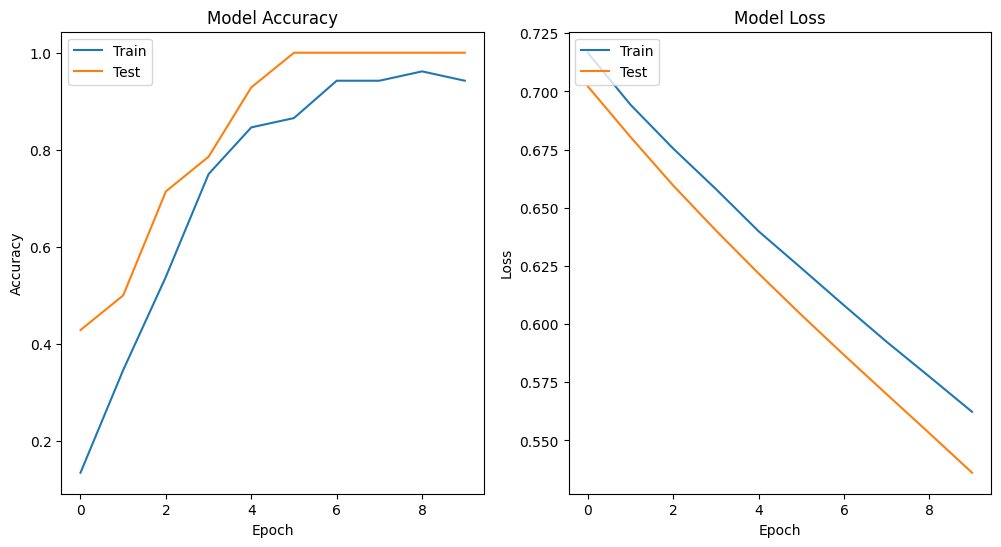

In [33]:
# Debugging: Print the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build and train the model
model = build_model(X_train.shape[1])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

Here's an example of how you can create a 3D scatter plot of your data, with points color-coded based on their labels (working or not working):

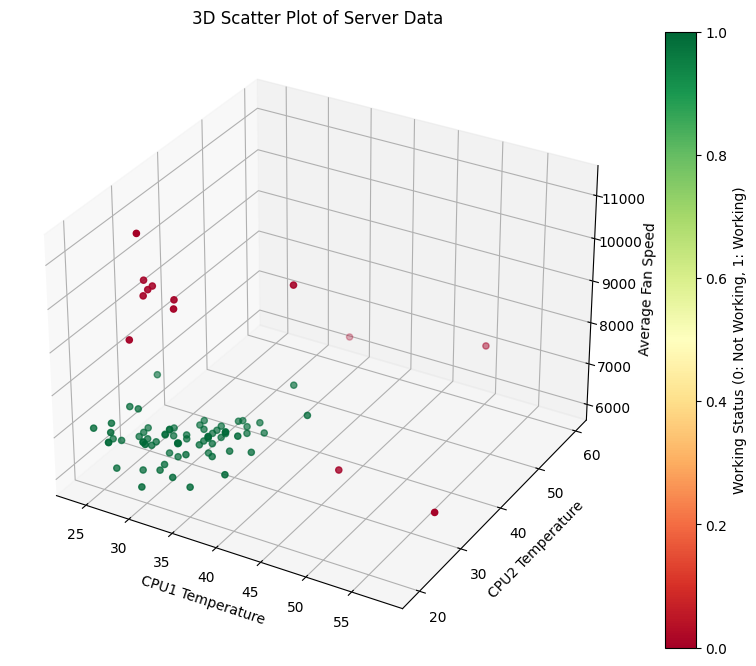

In [34]:
# Load data again to get unscaled values for better visualization
X, y = load_data(file_path)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='RdYlGn', marker='o')

# Labels and title
ax.set_xlabel('CPU1 Temperature')
ax.set_ylabel('CPU2 Temperature')
ax.set_zlabel('Average Fan Speed')
ax.set_title('3D Scatter Plot of Server Data')

# Colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Working Status (0: Not Working, 1: Working)')

plt.show()

Attempt to produce a user interaction


In [44]:
def predict_server_status(cpu1_temp, cpu2_temp, fan_speed, model, scaler):
    # Prepare the input data in the same format as the training data
    input_data = np.array([[cpu1_temp, cpu2_temp, fan_speed]])
    input_data_scaled = scaler.transform(input_data)

    # Make a prediction
    prediction = model.predict(input_data_scaled)
    status = 'Working' if prediction[0][0] > 0.5 else 'Not Working'
    return status

# Example usage
status = predict_server_status(55, 22, 6000, model, scaler)
print("Server Status:", status)

1/1 [==============================] - 0s 16ms/step
Server Status: Not Working


In [45]:
model.save('my_model.h5')

# Save the scaler
import joblib
joblib.dump(scaler, 'scaler.gz')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['scaler.gz']

In [37]:
import tensorflow as tf
import joblib

# Load the TensorFlow model
model = tf.keras.models.load_model('my_model.h5')

# Load the scaler
scaler = joblib.load('scaler.gz')

In [38]:
import pandas as pd

# Load the data
data_df = pd.read_csv(file_path)

# Apply scaling
X_scaled = scaler.transform(data_df[['cpu1_temp', 'cpu2_temp', 'average_fan_speed']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [39]:
# Make predictions
predictions = model.predict(X_scaled)

# Convert predictions to binary labels
predicted_labels = (predictions > 0.5).astype(int).flatten()

3/3 [==============================] - 0s 4ms/step


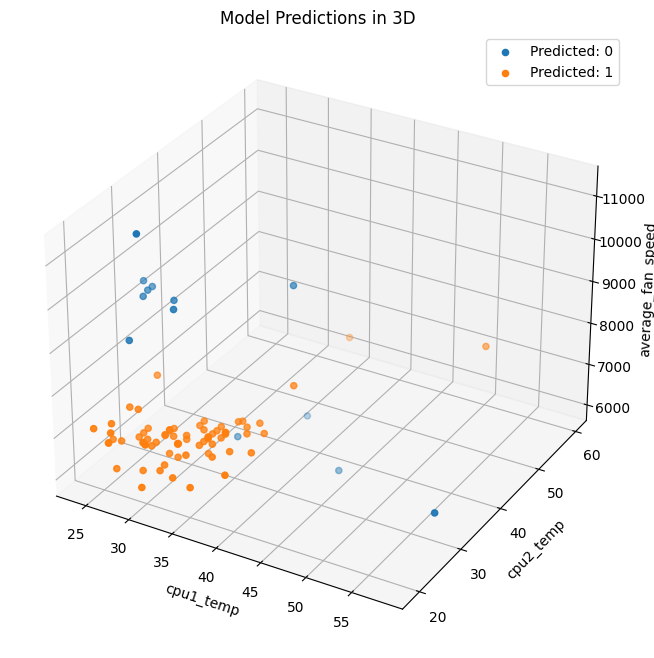

In [40]:
from mpl_toolkits.mplot3d import Axes3D

# Selecting features for the plot
feature1 = 'cpu1_temp'
feature2 = 'cpu2_temp'
feature3 = 'average_fan_speed'

# Create a 3D scatter plot
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

# Plotting data points with different colors based on predicted label
for label in [0, 1]:
    filtered_data = data_df[predicted_labels == label]
    ax.scatter(filtered_data[feature1], filtered_data[feature2], filtered_data[feature3], label=f'Predicted: {label}')

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
ax.legend()
ax.set_title('Model Predictions in 3D')
plt.show()

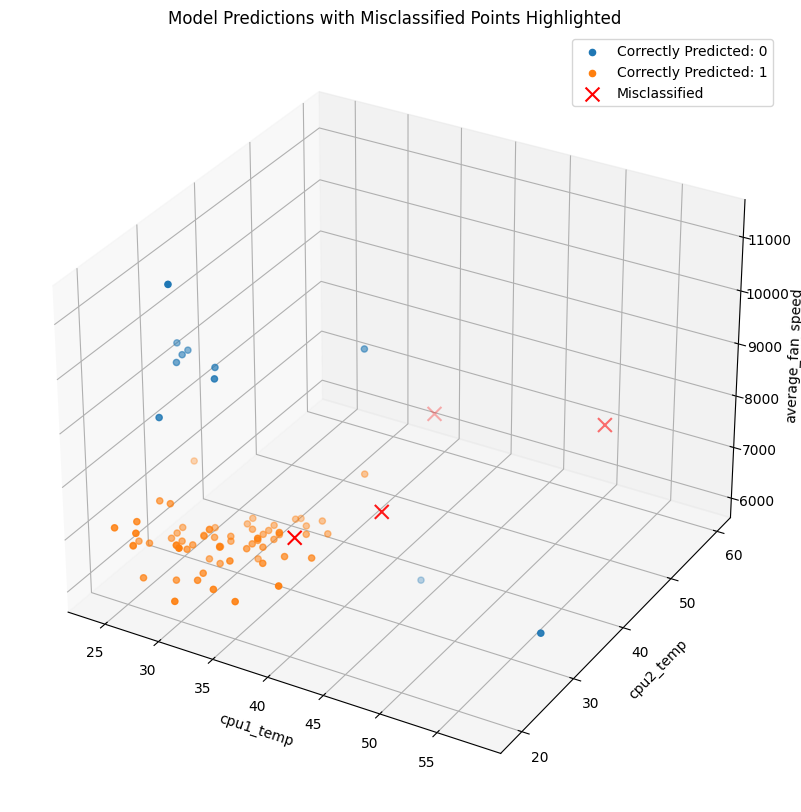

In [41]:
from mpl_toolkits.mplot3d import Axes3D

# Actual labels
actual_labels = data_df['working']

# Identify misclassified points
misclassified = predicted_labels != actual_labels

# Selecting features for the plot
feature1 = 'cpu1_temp'
feature2 = 'cpu2_temp'
feature3 = 'average_fan_speed'

# Create a 3D scatter plot
plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')

# Plotting correctly classified points
for label in [0, 1]:
    filtered_data = data_df[(predicted_labels == label) & ~misclassified]
    ax.scatter(filtered_data[feature1], filtered_data[feature2], filtered_data[feature3], label=f'Correctly Predicted: {label}')

# Highlighting misclassified points
ax.scatter(data_df.loc[misclassified, feature1],
           data_df.loc[misclassified, feature2],
           data_df.loc[misclassified, feature3],
           color='red', marker='x', label='Misclassified', s=100)

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
ax.legend()
ax.set_title('Model Predictions with Misclassified Points Highlighted')
plt.show()

In [42]:
# Calculate the number of misclassifications
num_misclassified = sum(misclassified)

# Print the number of misclassifications
print(f"Number of Misclassified Points: {num_misclassified}")

Number of Misclassified Points: 4


313/313 [==============================] - 1s 2ms/step


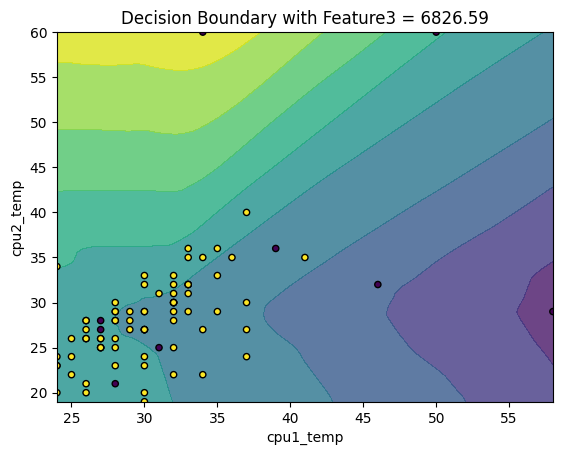

In [43]:
import numpy as np

# Feature ranges - you may need to adjust these based on your data
feature1_range = np.linspace(data_df[feature1].min(), data_df[feature1].max(), 100)
feature2_range = np.linspace(data_df[feature2].min(), data_df[feature2].max(), 100)

# Create a mesh grid
xx, yy = np.meshgrid(feature1_range, feature2_range)

# Set the constant value for the third feature (e.g., the mean)
feature3_constant = data_df[feature3].mean()

# Predict for each point in the mesh grid
grid_predictions = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel(), np.full_like(xx.ravel(), feature3_constant)]))
grid_predictions = grid_predictions.reshape(xx.shape)

# Plotting the decision boundary
plt.contourf(xx, yy, grid_predictions, alpha=0.8)
plt.scatter(data_df[feature1], data_df[feature2], c=data_df['working'], edgecolors='k', s=20)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundary with Feature3 = {:.2f}'.format(feature3_constant))
plt.show()